<a href="https://colab.research.google.com/github/anisfreelancer71/mycode/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample Dataset

In [90]:
import pandas as pd

custommer = {
    'LB': [200,280,60,100,350,250,300,80],
    'KT': [2,3,1,2,5,3,4,1],
    'HRG': ['murah','mahal','murah','murah','mahal','murah','mahal','murah']

}

custommer_df = pd.DataFrame(custommer)
custommer_df

,LB,KT,HRG
0,200,2,murah
1,280,3,mahal
2,60,1,murah
3,100,2,murah
4,350,5,mahal
5,250,3,murah
6,300,4,mahal
7,80,1,murah


#Visualisasi Data

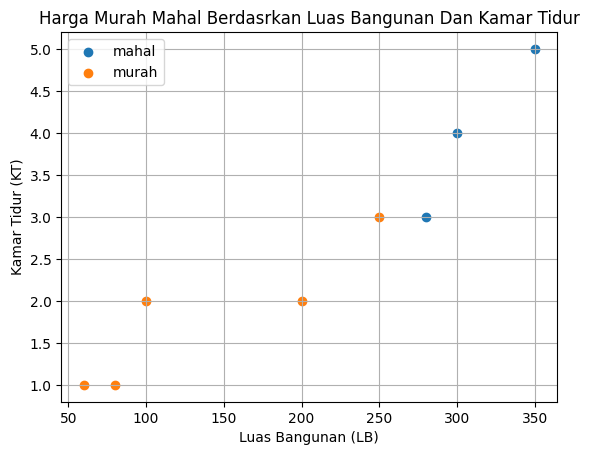

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for HRG, d in custommer_df.groupby("HRG"):
    ax.scatter(d['LB'],d['KT'], label=HRG)

plt.legend(loc='upper left')
plt.title("Harga Murah Mahal Berdasrkan Luas Bangunan Dan Kamar Tidur")
plt.xlabel("Luas Bangunan (LB)")
plt.ylabel("Kamar Tidur (KT)")
plt.grid(True)
plt.show()

#Preprocessing Dataset

In [92]:
import numpy as np

X_train = np.array(custommer_df[['LB', 'KT']])
y_train = np.array(custommer_df['HRG'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[200   2]
 [280   3]
 [ 60   1]
 [100   2]
 [350   5]
 [250   3]
 [300   4]
 [ 80   1]]

y_train: ['murah' 'mahal' 'murah' 'murah' 'mahal' 'murah' 'mahal' 'murah']


In [93]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]


In [94]:
y_train = y_train.flatten()
print(f'y_train:\n{y_train}')

y_train:
[1 0 1 1 0 1 0 1]


#Training KNN classification Model

In [95]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#Prediksi Harga Rumah (Mahal , Murah)

In [96]:
luas_bangunan = 400
kamar_tidur = 4
X_new = np.array([luas_bangunan, kamar_tidur ]).reshape(1, -1)
X_new

array([[400,   4]])

In [97]:
y_new = model.predict(X_new)
y_new

array([0])

In [98]:
lb.inverse_transform(y_new)

array(['mahal'], dtype='<U5')

#Visualisasi Nearest Neighbours

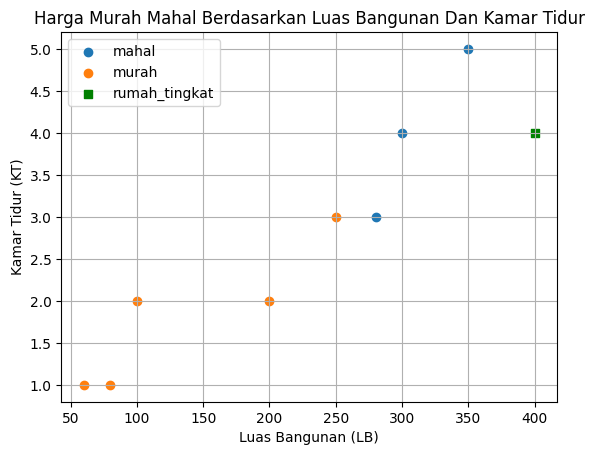

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for HRG, d in custommer_df.groupby("HRG"):
    ax.scatter(d['LB'],d['KT'], label=HRG)

plt.scatter(luas_bangunan,
            kamar_tidur,
            marker='s',
            color='green',
            label='rumah_tingkat')

plt.legend(loc='upper left')
plt.title("Harga Murah Mahal Berdasarkan Luas Bangunan Dan Kamar Tidur")
plt.xlabel("Luas Bangunan (LB)")
plt.ylabel("Kamar Tidur (KT)")
plt.grid(True)
plt.show()

#Kalkulasi Distance (Euclidean Distance)

In [100]:
rumah_tingkat = np.array([luas_bangunan, kamar_tidur])
rumah_tingkat

array([400,   4])

In [101]:
X_train

array([[200,   2],
       [280,   3],
       [ 60,   1],
       [100,   2],
       [350,   5],
       [250,   3],
       [300,   4],
       [ 80,   1]])

In [103]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(rumah_tingkat, d) for d in X_train]
data_jarak

[200.0099997500125,
 120.00416659433121,
 340.0132350365203,
 300.00666659259423,
 50.00999900019995,
 150.00333329629711,
 100.0,
 320.0140621910231]

In [104]:
custommer_df['jarak'] = data_jarak
custommer_df.sort_values(['jarak'])

,LB,KT,HRG,jarak
4,350,5,mahal,50.009999
6,300,4,mahal,100.000000
1,280,3,mahal,120.004167
5,250,3,murah,150.003333
0,200,2,murah,200.010000
3,100,2,murah,300.006667
7,80,1,murah,320.014062
2,60,1,murah,340.013235


#Evaluasi KN Classification Model

###Testing Set

In [105]:
X_test = np.array([[320, 4],[260, 3],[140, 2],[500, 6]])
y_test = lb.transform(np.array(['mahal', 'mahal', 'murah', 'mahal'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[320   4]
 [260   3]
 [140   2]
 [500   6]]

y_test:
[0 0 1 0]


###Prediksi terhadap testing set

In [106]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0])

In [107]:
lb.inverse_transform(y_pred)

array(['mahal', 'mahal', 'murah', 'mahal'], dtype='<U5')